                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.49e-12
Time:                        13:40:17   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0

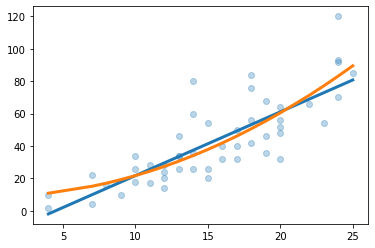

In [ ]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_excel('/content/data.xlsx', names=['Speed', 'Distance'], usecols='C,D', dtype='float', skiprows=range(0,6))
data.dropna()
#print(data)

X = sm.add_constant(data['Speed'])
model = sm.OLS(data['Distance'],X)
results = model.fit()

plt.scatter(data['Speed'],data['Distance'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*data['Speed']
plt.plot(data['Speed'],y_predict, linewidth=3)

print(results.summary())

model2 = sm.OLS(data['Distance'], X**2)
results2 = model2.fit()

y_predict2 = results2.params[0] + results2.params[1]*data['Speed']*data['Speed']
plt.plot(data['Speed'],y_predict2, linewidth=3)

print(results2.summary())
'''
X2 = X.copy()
X2['square'] = X2['Speed']**2
model3 = sm.OLS(data['Distance'], X2)
print(X2)
results3 = model3.fit()

y_predict3 = results3.params[0] + results3.params[1]*X2['Speed'] + results3.params[2]*X2['square']
plt.plot(data['Speed'],y_predict3, linewidth=3)

print(results3.summary())


print(results3.params)
#print(y_predict2)
'''
def pred(i):
    return results2.params[0] + results2.params[1]*i*i

print(pred(18))
print(pred(27))